# SALES PREDICTION USING PYTHON
### Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Reading Data and Preprocessing

In [2]:
data = pd.read_csv('IRIS.csv')
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#doing label encoding
enc = LabelEncoder()
enc_data = enc.fit_transform(data['species'])
dec_data = {0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}
data['speciescode'] = enc_data
df = data.drop('species',axis='columns')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,speciescode
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splittig into training & testing set

In [5]:
factors = ['petal_length','petal_width','sepal_length','sepal_width']
target = 'speciescode'
features = df[factors]
pred = df[target]

### Scaling features

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features,columns=features.columns)
scaled_features.head()

,petal_length,petal_width,sepal_length,sepal_width
0,-1.341272,-1.312977,-0.900681,1.032057
1,-1.341272,-1.312977,-1.143017,-0.124958
2,-1.398138,-1.312977,-1.385353,0.337848
3,-1.284407,-1.312977,-1.506521,0.106445
4,-1.341272,-1.312977,-1.021849,1.263460


### Dividing data into training set and testing set

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_features,pred,test_size=0.2,random_state=42,shuffle=True)
tdf = pd.concat([xtrain,ytrain],axis='columns',names=[features.columns,'speciescode'])
tdf.head()

,petal_length,petal_width,sepal_length,sepal_width,speciescode
22,-1.568735,-1.312977,-1.506521,1.263460,0
15,-1.284407,-1.050031,-0.173674,3.114684,0
65,0.364699,0.264699,1.038005,0.106445,1
11,-1.227541,-1.312977,-1.264185,0.800654,0
42,-1.398138,-1.312977,-1.748856,0.337848,0


## Analysing Training Data

### Analysing Seal and Petal Variations for all the species

In [8]:
#Filtering data for species
sp0 = tdf[tdf['speciescode']==0]
sp1 = tdf[tdf['speciescode']==1]
sp2 = tdf[tdf['speciescode']==2]
#print(np.array(sp0).shape)

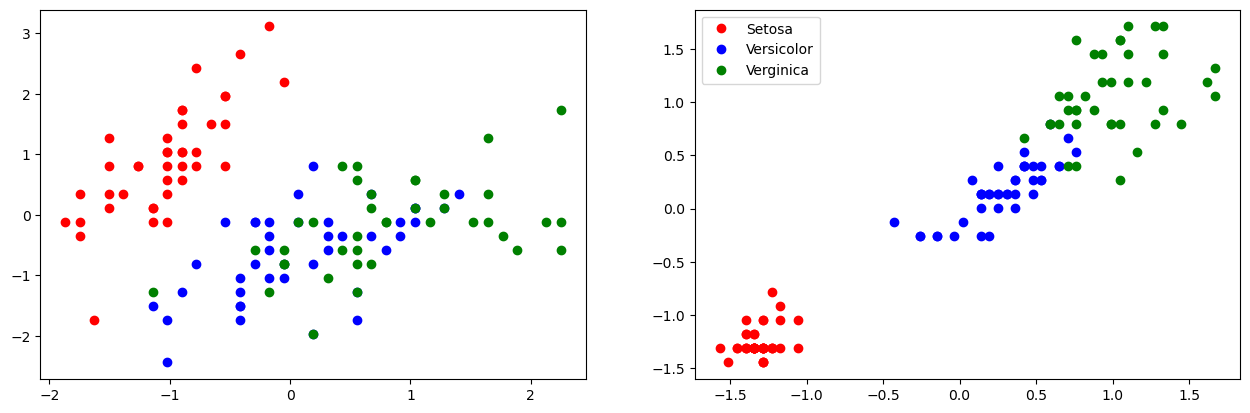

In [9]:
#plotting data for sepals variations
plt.subplot(1,2,1)
plt.plot(sp0['sepal_length'],sp0['sepal_width'],'ro')
plt.plot(sp1['sepal_length'],sp1['sepal_width'],'bo')
plt.plot(sp2['sepal_length'],sp2['sepal_width'],'go')
plt.subplot(1,2,2)
plt.plot(sp0['petal_length'],sp0['petal_width'],'ro')
plt.plot(sp1['petal_length'],sp1['petal_width'],'bo')
plt.plot(sp2['petal_length'],sp2['petal_width'],'go')
plt.subplots_adjust(right=2)
plt.legend(['Setosa','Versicolor','Verginica'])
plt.show()

### Handeling outliers

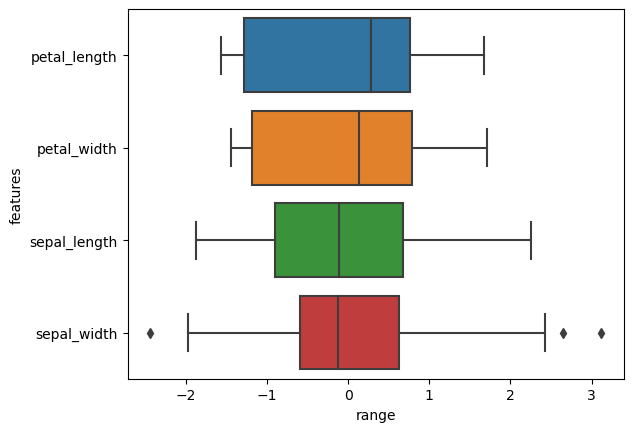

In [10]:
sns.boxplot(data=xtrain,orient='h').set(xlabel='range',ylabel='features')
plt.show()

#### Handeling outliers present in sepal width

In [11]:
def outliers(x):
    #this will return outliers using quartile range method
    #argument passes is an array of column containing outliers
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    median = np.median(x)
    #finding inter quartile region
    iqr = q3 - q1
    ubound = q3+(1.5*iqr)
    lbound = q1-(1.5*iqr)
    #calculating outliers and their indices
    out = x[(x>=ubound) | (x<=lbound)]
    outin = np.where(((x>=ubound) | (x<=lbound)))
    return out,outin[0].tolist()

##### backing up and finalising training data without outliers

In [12]:
tdf2 = tdf.copy()
tdf2.reset_index(drop=True,inplace=True)
outs,inds = outliers(tdf2['sepal_width'].to_numpy())
print("Outliers : ",outs)
print('Indices of Outliers : ',inds)

Outliers :  [ 3.11468391 -2.43898725  2.65187798]
Indices of Outliers :  [1, 29, 41]


In [13]:
tdf2.drop(inds,inplace=True)
tdf2.reset_index(drop=True,inplace=True)
#tdf2.head()

In [14]:
#Updating xtrain & ytrain
xtrain = tdf2[factors]
ytrain = tdf2[target]

### Statastical Description of final training dataset

In [15]:
tdf2.describe()

,petal_length,petal_width,sepal_length,sepal_width,speciescode
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.005521,0.000629,-0.028687,-0.020134,1.008547
std,0.993865,0.991021,1.006149,0.948030,0.814690
min,-1.568735,-1.444450,-1.870024,-1.976181,0.000000
25%,-1.227541,-1.181504,-0.900681,-0.587764,0.000000
50%,0.307833,0.133226,-0.052506,-0.124958,1.000000
75%,0.762759,0.790591,0.674501,0.569251,2.000000
max,1.672610,1.710902,2.249683,2.420475,2.000000


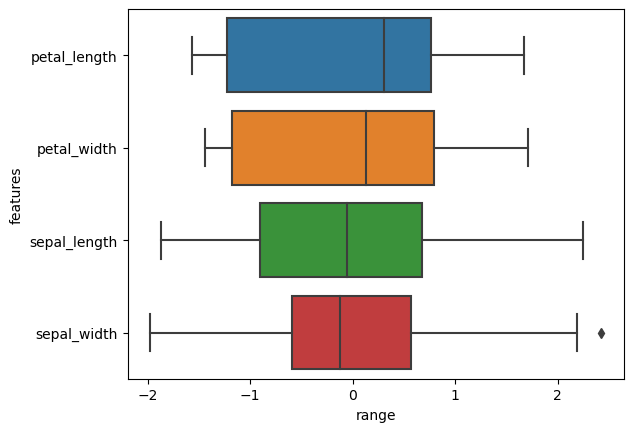

In [16]:
sns.boxplot(data=xtrain,orient='h').set(xlabel='range',ylabel='features')
plt.show()

Outliers :  [2.42047502]
Indices of Outliers :  [8]


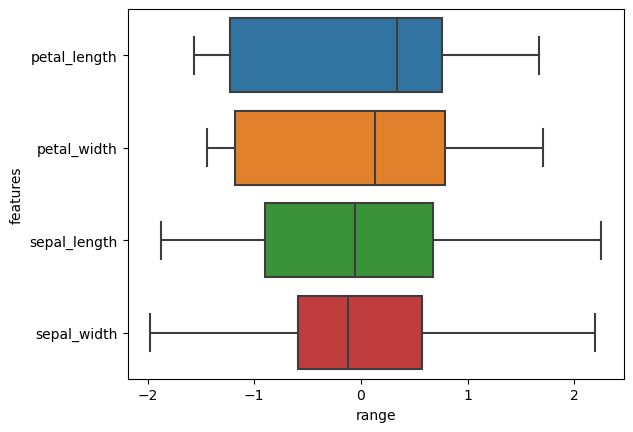

In [17]:
outs,inds = outliers(tdf2['sepal_width'].to_numpy())
print("Outliers : ",outs)
print('Indices of Outliers : ',inds)
tdf2.drop(inds,inplace=True)
tdf2.reset_index(drop=True,inplace=True)
xtrain = tdf2[factors]
ytrain = tdf2[target]
sns.boxplot(data=xtrain,orient='h').set(xlabel='range',ylabel='features')
plt.show()

## Visualzing the sepal and petal lengths with Species

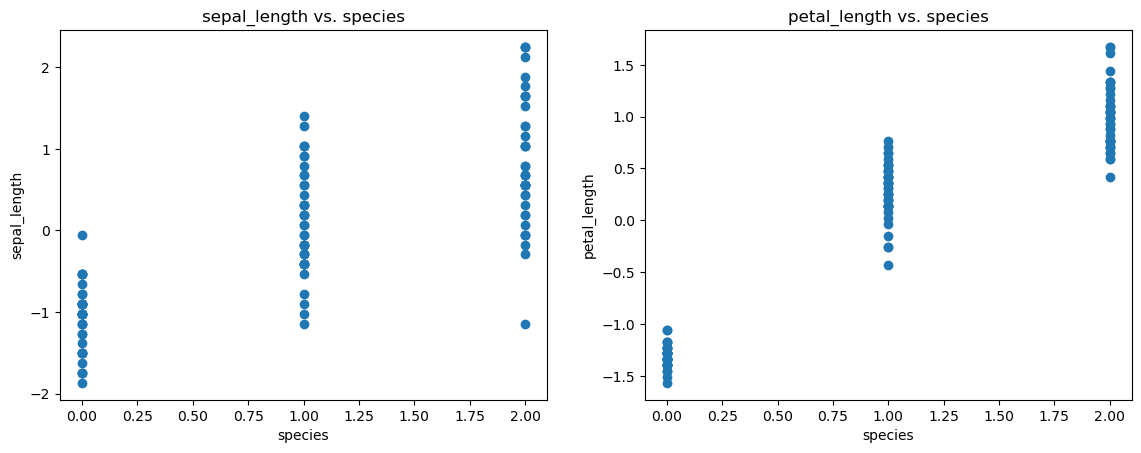

In [18]:
plt.subplot(1,2,1)
plt.scatter(ytrain, xtrain['sepal_length'])
plt.title("sepal_length vs. species")
plt.xlabel("species")
plt.ylabel("sepal_length")
plt.subplot(1,2,2)
plt.scatter(ytrain,xtrain['petal_length'])
plt.title("petal_length vs. species")
plt.xlabel("species")
plt.ylabel("petal_length")
plt.subplots_adjust(right=1.8)
plt.show()

## Model Building, Training & Testing
### Model used in Logistic Regression
Logistic regression is generally used for binary classification, that is when there are only two cases either true or false. But here there are three species and still model can be used.
The reason behind using this model is:-
##### Out of three model can pedict 2 values correctly, then the third classification will be the one which is not present in either of two classes. For example:- there are 3 classes, 1,2 & 3. the model can predict classes 1 and 2 correctly. Then the class 3 will be the one which is not present in class 1 and 2.

In [19]:
model = LogisticRegression(random_state=0) 
model.fit(xtrain, ytrain)
pred_train = model.predict(xtrain)
pred = model.predict(xtest)

### Visualizing the attributes of predicted data and existing results

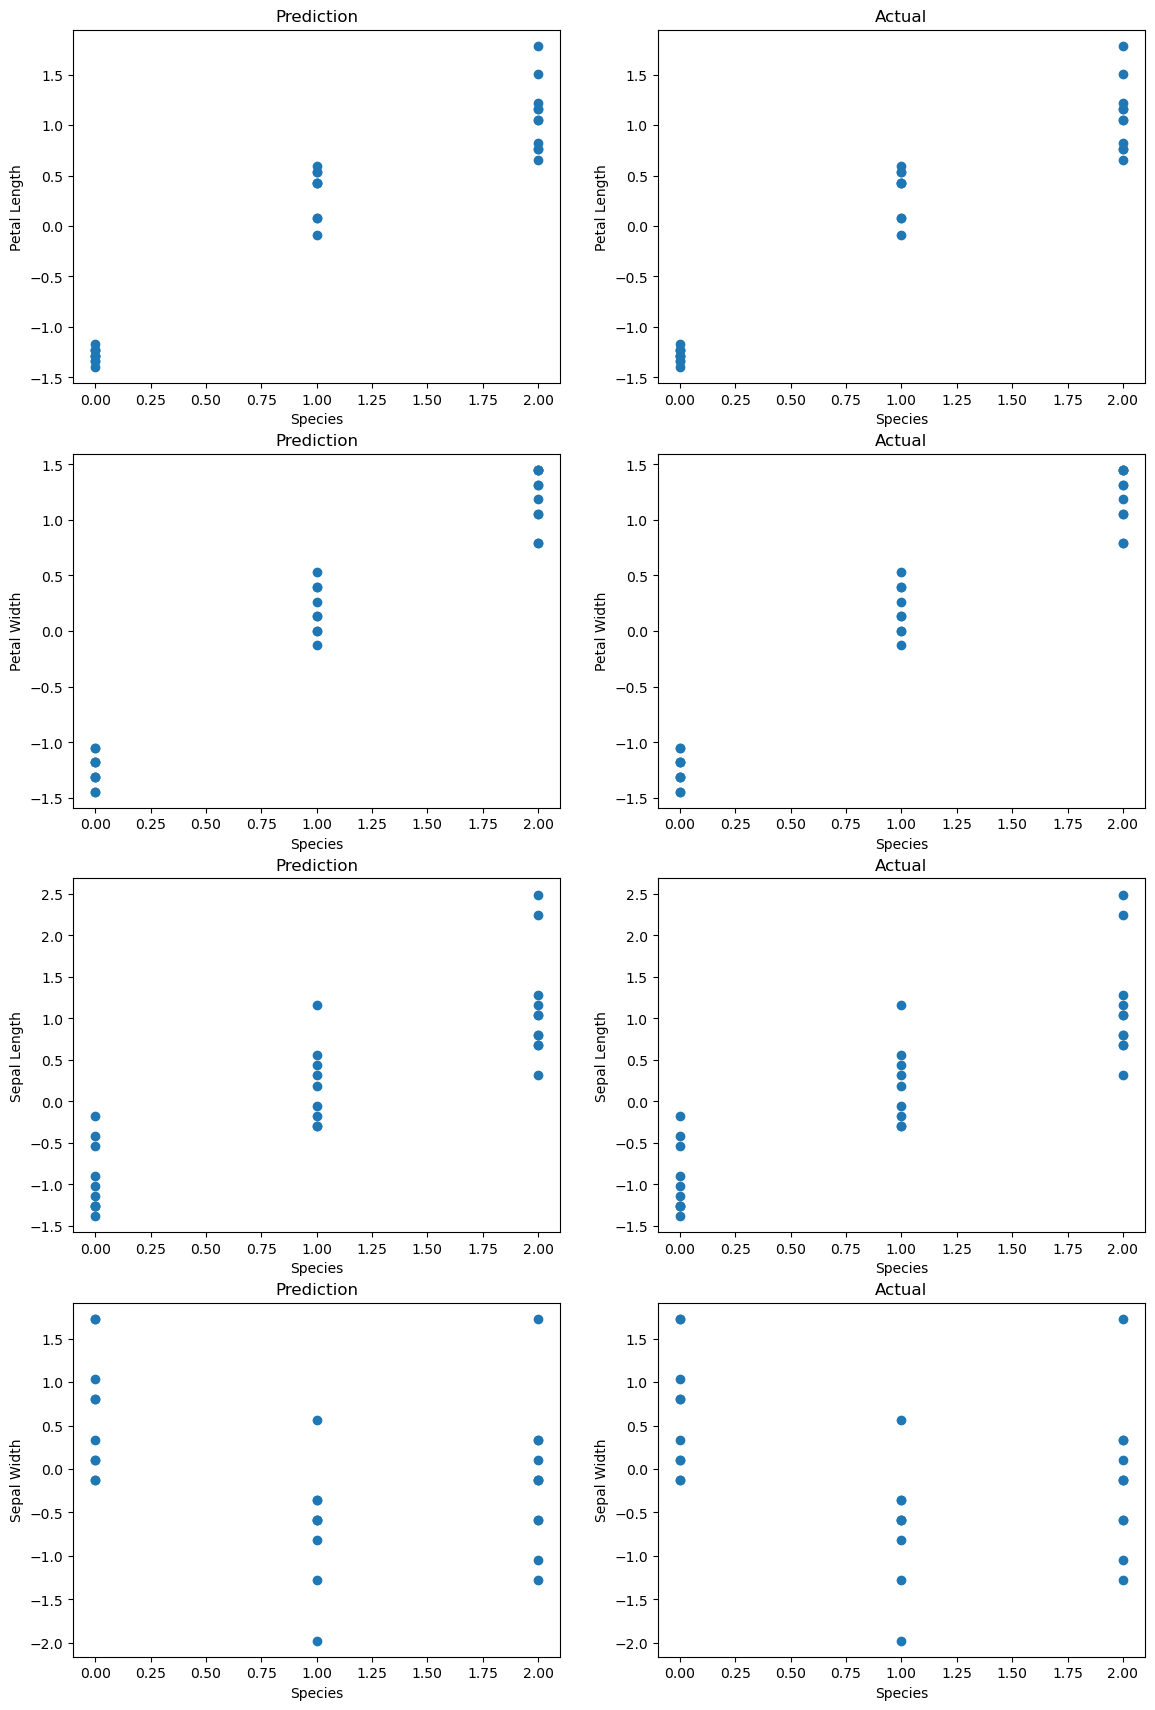

In [20]:
#Coparing predicted values and actual values
#Petal length
plt.subplot(4,2,1)
plt.scatter(pred,xtest['petal_length'])
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Prediction')
plt.subplot(4,2,2)
plt.scatter(ytest,xtest['petal_length'])
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Actual')
#petal width
plt.subplot(4,2,3)
plt.scatter(pred,xtest['petal_width'])
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Prediction')
plt.subplot(4,2,4)
plt.scatter(ytest,xtest['petal_width'])
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Actual')
#sepal length
plt.subplot(4,2,5)
plt.scatter(pred,xtest['sepal_length'])
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Prediction')
plt.subplot(4,2,6)
plt.scatter(ytest,xtest['sepal_length'])
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Actual')
#sepal width
plt.subplot(4,2,7)
plt.scatter(pred,xtest['sepal_width'])
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.title('Prediction')
plt.subplot(4,2,8)
plt.scatter(ytest,xtest['sepal_width'])
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.title('Actual')
#Adjustments
plt.subplots_adjust(right=1.8,top=3.5)
plt.show()

## Measuring accuracy of model using accuracy score and confusion matrix

In [21]:
# Print the evaluation metrics on train data
accuracy_train = accuracy_score(ytrain, pred_train)
print("Train accuracy: ", np.round(accuracy_train, decimals=3))

# Print the evaluation metrics on train data
accuracy = accuracy_score(ytest, pred)
confusion_mat = confusion_matrix(ytest, pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Confusion Matrix")
print(confusion_mat)

Train accuracy:  0.966
Test accuracy:  1.0
Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
